In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy.random as npr

data = np.genfromtxt('cancer_data.csv', delimiter=',', dtype=np.string_)

In [2]:
real_data = data[1:, :]
#데이터 섞어주기 아주 중요하다!
npr.shuffle(real_data)

In [3]:
data.shape

(101, 3)

In [4]:
x = real_data[:,:2]
y = real_data[:,2]

In [5]:
# 데이터 뽑기
train_x = x[:60]
train_y = y[:60]

test_x = x[60:80]
test_y = y[60:80]

val_x = x[80:]
val_y = y[80:]

In [6]:
train_x = train_x.astype(np.float32)
train_y = train_y.astype(np.float32)

test_x = test_x.astype(np.float32)
test_y = test_y.astype(np.float32)

val_x = val_x.astype(np.float32)
val_y = val_y.astype(np.float32)

In [7]:
print('평균:', 'train_x',train_x.mean())
print('최소값:',train_x.min())
print('최대값:', train_x.max())
print('표준편차:', train_x.std())

평균: train_x 4.1401343
최소값: 0.49454185
최대값: 11.170589
표준편차: 2.2594547


In [8]:
train_x_0 = train_x[:, 0]
train_x_0.mean()

4.163056

In [9]:
# 데이터 찾기
indices = np.where(train_x[:,0]>train_x.mean())[0]

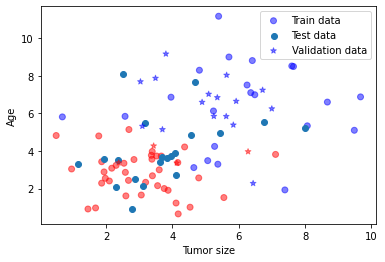

In [10]:
#데이터 시각화

train_colors = ['b' if label == 0 else 'r' for label in train_y]
plt.scatter(train_x[:,0], train_x[:,1], label = 'Train data', alpha = 0.5, 
            marker='o', c = train_colors)

test_colors = ['b' if label == 0 else 'r' for label in test_y]
plt.scatter(test_x[:, 0], test_x[:, 1], label='Test data')

val_colors = ['b' if label == 0 else 'r' for label in val_y]
plt.scatter(val_x[:, 0], val_x[:, 1], label='Validation data', alpha=0.5, 
            marker ='*', c = val_colors)

plt.xlabel('Tumor size')
plt.ylabel('Age')
plt.legend()
plt.show()